In [152]:
import pandas as pd 

df = pd.read_csv('/Users/liammacdonald/Desktop/customer_segmentation_fixed (1).csv')

In [17]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntClothing,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/8/2013,26,,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/1/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


/Users/liammacdonald/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


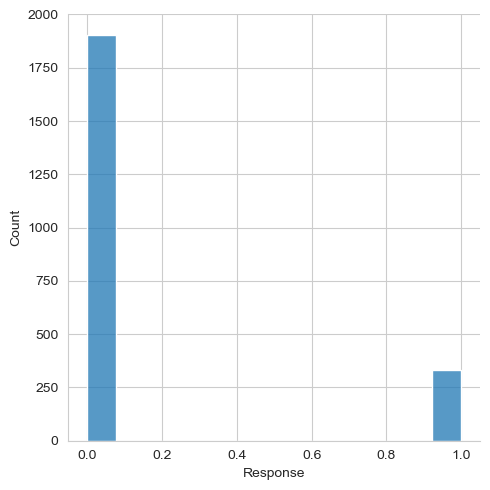

In [159]:
# Based on Professor's Request: Visualizing Distribution of Response 

import seaborn as sns 
import matplotlib.pyplot as plt

sns.displot(x='Response', data=df, fill=True)
plt.show()

# Note - For the report, state that at this step we had encoded categorical variables, normalized the data and analyzed linear correlation between feature variables and target variable "response", dropping features with non-significant correlation 

In [18]:
df_clean = df.dropna()

In [19]:
# Keeping only columns with significant correlation


columns_to_keep = ['AcceptedCmp1', 'AcceptedCmp5', 'AcceptedCmp3', 'NumCatalogPurchases', 'MntGroceries', 'Response']

# Drop all columns except the ones in columns_to_keep
df.drop(df.columns.difference(columns_to_keep), axis=1, inplace=True)

df.head()

X = df

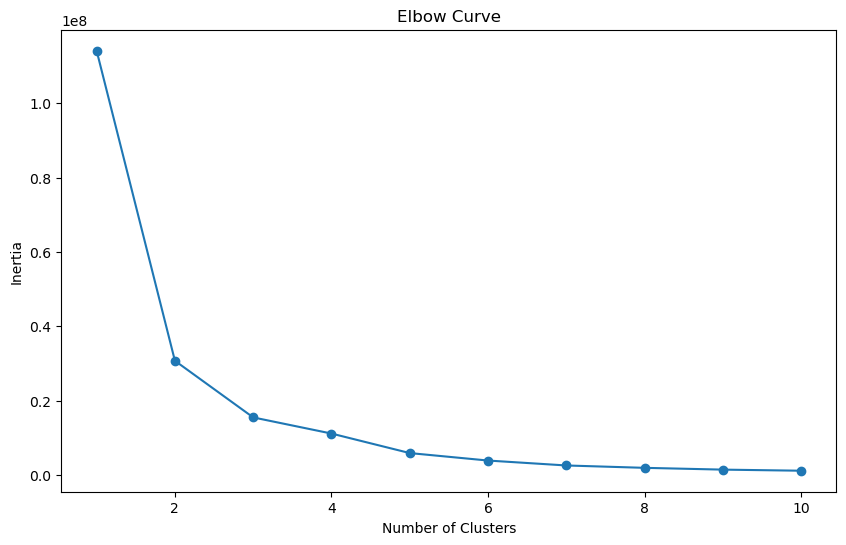

In [21]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

def compute_inertia(X, max_clusters=10):
    inertia_values = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia_values.append(kmeans.inertia_)
    return inertia_values

inertia_values = compute_inertia(X, max_clusters=10)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [7]:
from sklearn.cluster import KMeans

In [23]:
X = df 

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [24]:
cluster_labels = kmeans.labels_
df['Cluster'] = cluster_labels

df

,MntGroceries,NumCatalogPurchases,AcceptedCmp3,AcceptedCmp5,AcceptedCmp1,Response,Cluster
0,546,10,0,0,0,1,1
1,6,1,0,0,0,0,0
2,127,2,0,0,0,0,0
3,20,0,0,0,0,0,0
4,118,3,0,0,0,0,0
...,...,...,...,...,...,...,...
2235,182,3,0,0,0,0,0
2236,30,2,0,0,1,0,0
2237,217,3,0,0,0,0,2
2238,214,5,0,0,0,0,2


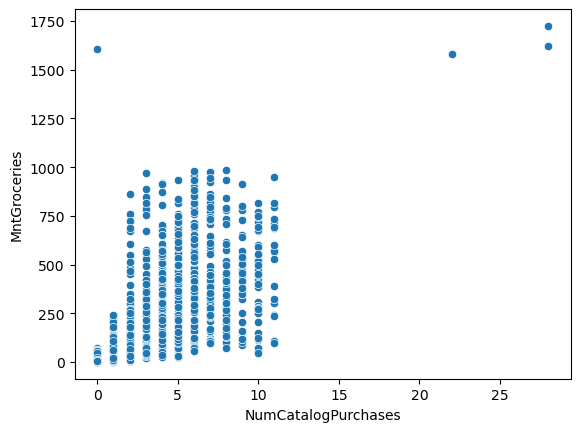

In [25]:
# Showing the linear relationship between catalog purchases and amount of groceries 
import seaborn as sns 

sns.scatterplot(x='NumCatalogPurchases', y='MntGroceries', data=df)
plt.show()

In [26]:
# Converting the cluster column to int 64 for visualization 

df['Cluster'] = df['Cluster'].astype('int64')


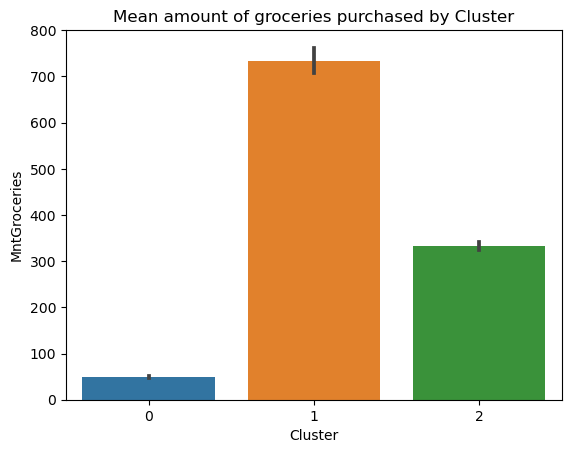

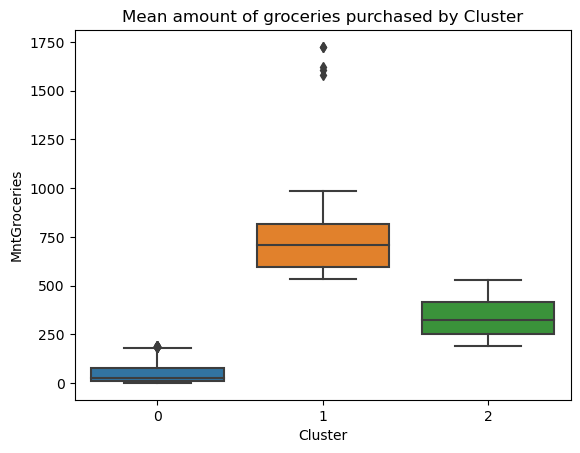

In [27]:
# Showing the cluster grouping is effected by the amount of groceries purchases 
sns.barplot(x='Cluster', y='MntGroceries', data=df)
plt.title('Mean amount of groceries purchased by Cluster')
plt.show()

sns.boxplot(x='Cluster', y='MntGroceries', data=df)
plt.title('Mean amount of groceries purchased by Cluster')
plt.show()

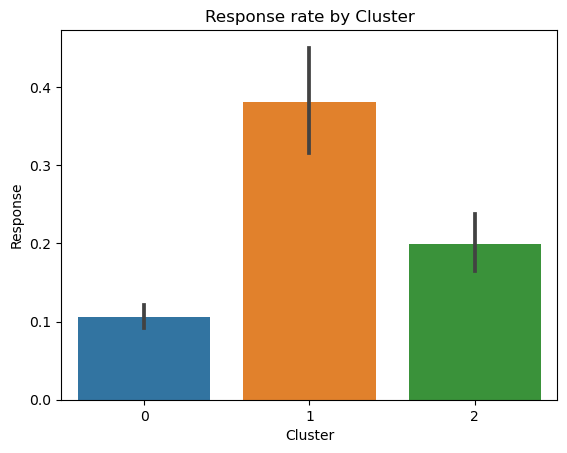

In [28]:
# Visualizing Response Rate by Cluster 

sns.barplot(x='Cluster', y='Response', data=df)
plt.title('Response rate by Cluster')
plt.show()



# Note - For the report, state that at this point we added the cluster labels back to the original dataframe to see if features that were dropped (such as birth year,  income, etc) effected cluster labels 

## Only significant was Average Income by cluster 

## Confirming Relative Accuracy - Silhoutte for K = 3

In [29]:
# Silhoutte score for k - means = 3

from sklearn.metrics import silhouette_score

silhoutte = silhouette_score(df, cluster_labels)

print('Silhoutte Score for 3 Clusters:', str(silhoutte))

Silhoutte Score for 3 Clusters: 0.7080984703436586


In [58]:
# Adding the cluster labels back to the original dataframe 

df_new = pd.read_csv('/Users/liammacdonald/Desktop/customer_segmentation_fixed (1).csv')

df_new['cluster'] = cluster_labels



In [59]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntClothing          2240 non-null   object 
 10  MntElectronics       2240 non-null   int64  
 11  MntGroceries         2240 non-null   int64  
 12  MntCosmetics         2240 non-null   int64  
 13  MntEntertainment     2240 non-null   int64  
 14  MntLuxuryProds       2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

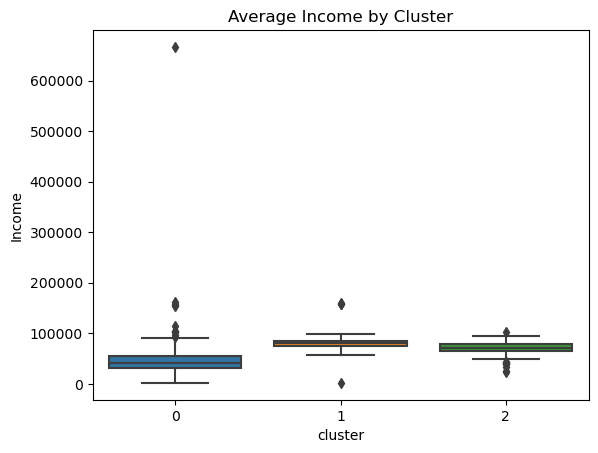

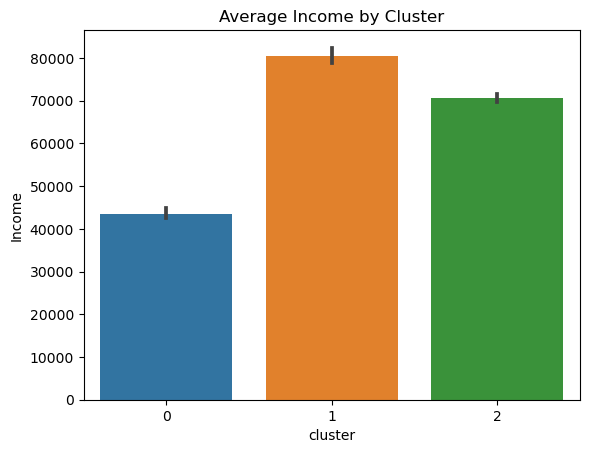

In [35]:
# Using a barplot/boxplot to show distribution of avg income by cluster 

import seaborn as sns
sns.boxplot(x='cluster', y='Income', data=df_new)
plt.title('Average Income by Cluster')
plt.show()

sns.barplot(x='cluster', y='Income', data=df_new)
plt.title('Average Income by Cluster')
plt.show()

## Note relationship between amount of groceries purchased, average income and response rate by cluster 

In [60]:
df

,MntGroceries,NumCatalogPurchases,AcceptedCmp3,AcceptedCmp5,AcceptedCmp1,Response,Cluster
0,546,10,0,0,0,1,1
1,6,1,0,0,0,0,0
2,127,2,0,0,0,0,0
3,20,0,0,0,0,0,0
4,118,3,0,0,0,0,0
...,...,...,...,...,...,...,...
2235,182,3,0,0,0,0,0
2236,30,2,0,0,1,0,0
2237,217,3,0,0,0,0,2
2238,214,5,0,0,0,0,2


In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Perform PCA
pca_2 = PCA(n_components=2)
pca_data_2 = pca_2.fit_transform(df)

pca_3 = PCA(n_components=3)
pca_data_3 = pca_3.fit_transform(df)

pca_df_2 = pd.DataFrame(pca_data_2, columns=['PC1', 'PC2'])
pca_df_3 = pd.DataFrame(pca_data_3, columns=['PC1', 'PC2', 'PC3'])

In [62]:
pca_df_2['Cluster'] = cluster_labels
pca_df_2.head()

,PC1,PC2,Cluster
0,379.102502,-3.747928,1
1,-160.959269,0.164113,0
2,-39.955553,0.320794,0
3,-146.969298,1.294209,0
4,-48.945758,-0.761645,0


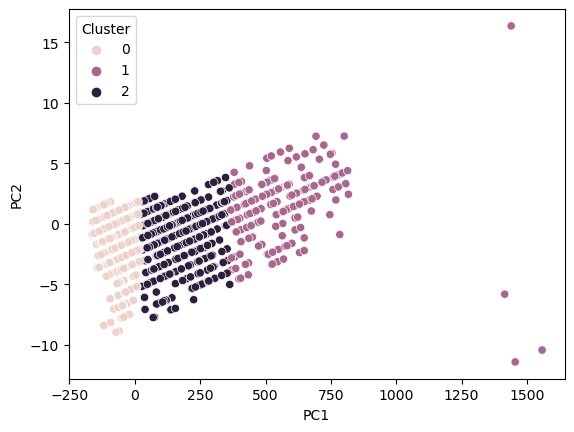

In [63]:
sns.scatterplot(x='PC1', y = 'PC2', hue='Cluster', data=pca_df_2)
plt.show()

In [64]:
pca_df_3['Cluster'] = cluster_labels
pca_df_3.head()

,PC1,PC2,PC3,Cluster
0,379.102502,-3.747928,0.653566,1
1,-160.959269,0.164113,0.100255,0
2,-39.955553,0.320794,0.363940,0
3,-146.969298,1.294209,0.046729,0
4,-48.945758,-0.761645,0.425250,0


In [65]:
from mpl_toolkits.mplot3d import Axes3D

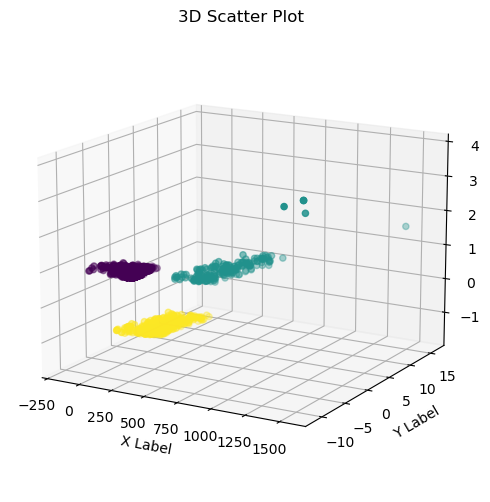

In [66]:
fig = plt.figure(figsize=(8, 6))  # Adjust figure size as needed

# Create a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Extract data for each axis
x = pca_df_3['PC1']
y = pca_df_3['PC2']
z = pca_df_3['PC3']

# Create the scatter plot with desired aesthetics
ax.scatter(x, y, z, c=pca_df_3['Cluster'], cmap='viridis')  # Color based on z value with viridis colormap

# Customize plot elements (optional)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

# Optional: Add grid and set viewing angles
ax.grid(True)
ax.view_init(elev=15, azim=-60)  # Adjust elevation and azimuth for a better view

plt.show()


## Three Dimensional Principal Component Analysis Shows there is clear seperation in clusters, however due to the ambigous nature of PCA component loadings, our group decided to pursue other options for analyzing the impacts and takeaways of our findings

# Naive Bayes 

In [106]:
df_NB = df.drop('Cluster', axis=1)
df_NB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   MntGroceries         2240 non-null   int64
 1   NumCatalogPurchases  2240 non-null   int64
 2   AcceptedCmp3         2240 non-null   int64
 3   AcceptedCmp5         2240 non-null   int64
 4   AcceptedCmp1         2240 non-null   int64
 5   Response             2240 non-null   int64
dtypes: int64(6)
memory usage: 105.1 KB


In [87]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


In [82]:
X_nb = df_NB.drop('Response', axis=1)  # All columns except the last (target variable)
y_nb = df_NB["Response"]  # Last column (target variable)


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_nb, y_nb, test_size=0.2, random_state=42)


In [110]:
# Fitting NB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [111]:
y_prob = model.predict_proba(X_test)

# Create a new DataFrame with the probabilities
prob_df = pd.DataFrame(y_prob, columns=['Class 0 Probability', 'Class 1 Probability'])

prob_df

,Class 0 Probability,Class 1 Probability
0,9.964916e-01,0.003508
1,9.952354e-01,0.004765
2,9.977379e-01,0.002262
3,1.778608e-12,1.000000
4,1.035974e-02,0.989640
...,...,...
443,8.117363e-04,0.999188
444,9.973459e-01,0.002654
445,9.928049e-01,0.007195
446,9.967800e-01,0.003220


In [112]:
mean_class_0 = prob_df['Class 0 Probability'].mean()
mean_class_1 = prob_df['Class 1 Probability'].mean()

# To show what the average probability of class 1 without reccomended changes 
print(mean_class_1)

0.17060350005379574


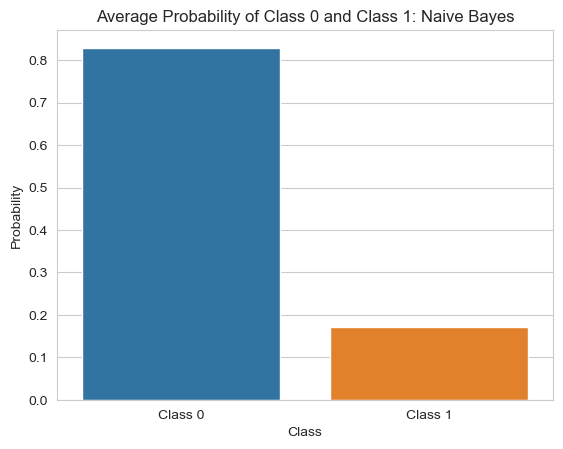

In [130]:
# Computing Average Probabilities by Class (Responded = 1, did not respond = 0) 

mean_class_0 = prob_df['Class 0 Probability'].mean()
mean_class_1 = prob_df['Class 1 Probability'].mean()

# Visualizing 

mean_df = pd.DataFrame({'Class': ['Class 0', 'Class 1'], 'Probability': [mean_class_0, mean_class_1]})

sns.set_style("whitegrid")
ax = sns.barplot(x='Class', y='Probability', data=mean_df)
ax.set_title('Average Probability of Class 0 and Class 1: Naive Bayes')
plt.show()

In [120]:
# Extremely challenging to re train the Gaussian NB with Cmp 3, 5 and 1 

# To showcase impact of reccomendation (Cmp 3, 5 and 1)   

row_2 = np.array([[127,	2,	0,	0,	0]])
row_3_prob = model.predict_proba(row_2)

prob_class_0 = row_3_prob[0, 0]
prob_class_1 = row_3_prob[0, 1]

prob_class_1

/Users/liammacdonald/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.003561123644924789

In [119]:
row_2_adjusted = np.array([[127, 2,	1,	1,	1]])
row_3_prob_a = model.predict_proba(row_2_adjusted)

prob_class_0_a = row_3_prob_a[0, 0]
prob_class_1_a = row_3_prob_a[0, 1]

prob_class_1_a

/Users/liammacdonald/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.9999999999999059

In [ ]:
# Implementing change on whole data set 

# Logistic Regression

In [128]:
# Logistic Regression 

df_log = df.drop('Cluster', axis = 1)



In [125]:
from sklearn.linear_model import LogisticRegression

x_log = df_log.drop('Response', axis=1)
y_log = df_log['Response']  

X_train, X_test, y_train, y_test = train_test_split(x_log, y_log, test_size=0.2, random_state=42)

# Create an instance of the LogisticRegression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

/Users/liammacdonald/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [127]:
y_pred_proba = logreg.predict_proba(X_test)

 

prob_df_log = pd.DataFrame(y_pred_proba, columns=['Class 0 Probability', 'Class 1 Probability'])

prob_df_log

,Class 0 Probability,Class 1 Probability
0,0.919864,0.080136
1,0.924366,0.075634
2,0.930775,0.069225
3,0.191545,0.808455
4,0.593668,0.406332
...,...,...
443,0.699107,0.300893
444,0.928764,0.071236
445,0.900541,0.099459
446,0.925407,0.074593


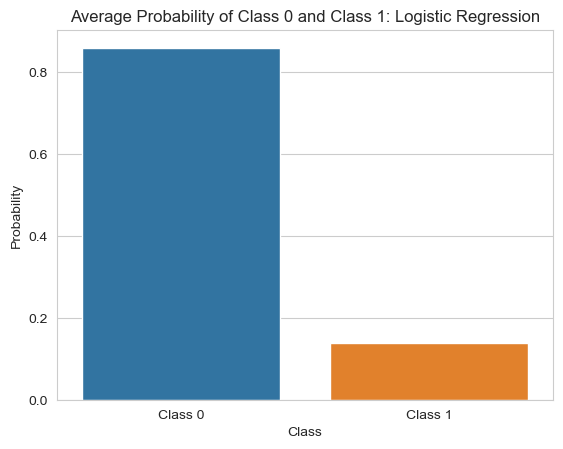

In [129]:
mean_class_0_log = prob_df_log['Class 0 Probability'].mean()
mean_class_1_log = prob_df_log['Class 1 Probability'].mean()

# Visualizing 

mean_df_log = pd.DataFrame({'Class': ['Class 0', 'Class 1'], 'Probability': [mean_class_0_log, mean_class_1_log]})

sns.set_style("whitegrid")
ax = sns.barplot(x='Class', y='Probability', data=mean_df_log)
ax.set_title('Average Probability of Class 0 and Class 1: Logistic Regression')
plt.show()

In [136]:
# Testing on Single Array - Log Reg 

row_3_prob_log = logreg.predict_proba(row_2)

prob_class_0_log = row_3_prob[0, 0]
prob_class_1_log = row_3_prob[0, 1]

prob_class_1_log

/Users/liammacdonald/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.003561123644924789

In [137]:
row_3_prob_alog = logreg.predict_proba(row_2_adjusted)

prob_class_0_alog = row_3_prob_a[0, 0]
prob_class_1_alog = row_3_prob_a[0, 1]

prob_class_1_alog

/Users/liammacdonald/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.9999999999999059

In [ ]:
# Implementing Changes - Log Reg 

# SVM 

In [132]:
from sklearn.svm import SVC

X_svc = df.drop('Response', axis=1)
y_svc = df['Response']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_svc, y_svc, test_size=0.2, random_state=42)

# Create an instance of the SVM model
svm = SVC()

# Fit the model to the training data
svm.fit(X_train, y_train)

SVC()

In [133]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_svm = CalibratedClassifierCV(svm, method='sigmoid', cv=5)
calibrated_svm.fit(X_train, y_train)

# Get probability estimates for new data
y_prob_svc = calibrated_svm.predict_proba(X_test)

prob_df_svc = pd.DataFrame(y_prob_svc, columns=['Class 0 Probability', 'Class 1 Probability'])

prob_df_svc.head()

,Class 0 Probability,Class 1 Probability
0,0.861721,0.138279
1,0.861746,0.138254
2,0.861802,0.138198
3,0.266719,0.733281
4,0.861842,0.138158


In [135]:
prob_df_svc['Class 1 Probability'].mean()

0.1470922780345775

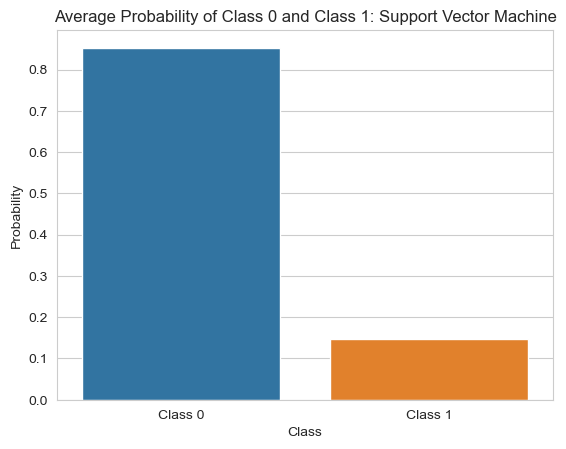

In [134]:
mean_class_0_svc = prob_df_svc['Class 0 Probability'].mean()
mean_class_1_svc = prob_df_svc['Class 1 Probability'].mean()

# Visualizing 

mean_df_svc = pd.DataFrame({'Class': ['Class 0', 'Class 1'], 'Probability': [mean_class_0_svc, mean_class_1_svc]})

sns.set_style("whitegrid")
ax = sns.barplot(x='Class', y='Probability', data=mean_df_svc)
ax.set_title('Average Probability of Class 0 and Class 1: Support Vector Machine')
plt.show()

In [138]:
# Testing on Single Array - SVM 

row_3_prob_svm = calibrated_svm.predict_proba(row_2_adjusted)

prob_class_0_svm = row_3_prob_a[0, 0]
prob_class_1_svm = row_3_prob_a[0, 1]

prob_class_1_svm

/Users/liammacdonald/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: X has 5 features, but SVC is expecting 6 features as input.

# In other circumstances, SVM would be appropriate since a hyperplane distinctly seperated two classes
## Here, time constraints and technical interpretatability are a limitation

__Testing on Whole Data Set__

In [141]:
# Replacing all values of 0 to 1 for Cmp 3, 5 and 1 to showcase impact of reccomendations 

df_NB['AcceptedCmp1'] = df_NB['AcceptedCmp1'].replace(0,1)
df_NB['AcceptedCmp3'] = df_NB['AcceptedCmp3'].replace(0,1)
df_NB['AcceptedCmp5'] = df_NB['AcceptedCmp5'].replace(0,1)

df_test = df_NB.drop('Response', axis=1)


,MntGroceries,NumCatalogPurchases,AcceptedCmp3,AcceptedCmp5,AcceptedCmp1
0,546,10,1,1,1
1,6,1,1,1,1
2,127,2,1,1,1
3,20,0,1,1,1
4,118,3,1,1,1
...,...,...,...,...,...
2235,182,3,1,1,1
2236,30,2,1,1,1
2237,217,3,1,1,1
2238,214,5,1,1,1


In [142]:
y_pred_prob_test = logreg.predict_proba(df_test)

 

prob_df_test = pd.DataFrame(y_pred_prob_test, columns=['Class 0 Probability', 'Class 1 Probability'])

prob_df_test

,Class 0 Probability,Class 1 Probability
0,0.048904,0.951096
1,0.100553,0.899447
2,0.087457,0.912543
3,0.100931,0.899069
4,0.086684,0.913316
...,...,...
2235,0.081223,0.918777
2236,0.096439,0.903561
2237,0.078371,0.921629
2238,0.075805,0.924195


In [148]:
# Average probability of class 1 - Logistic Regression after implementing reccomendations


prob_df_test['Class 1 Probability'].mean()

0.9145691426878082

In [149]:
# Average probability of class 1 - Naive Bayes after implementing reccomendations

y_pred_prob_test_1 = model.predict_proba(df_test)

 

prob_df_test_1 = pd.DataFrame(y_pred_prob_test_1, columns=['Class 0 Probability', 'Class 1 Probability'])

prob_df_test_1['Class 1 Probability'].mean()

0.9999999999999093

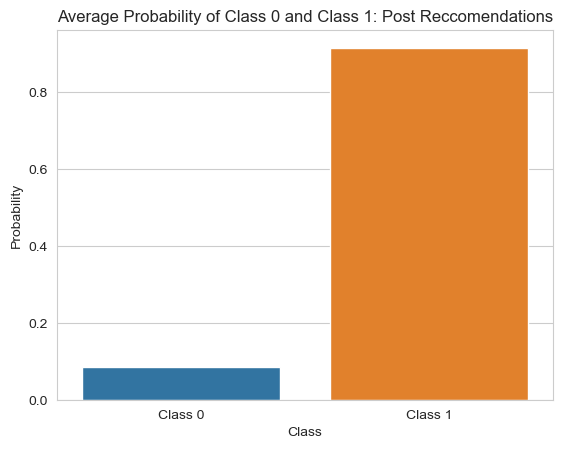

In [151]:
# Visualizing - Log Reg (Likely More accurate since NB arrives at average of 99%)

mean_class_0_test = prob_df_test['Class 0 Probability'].mean()
mean_class_1_test = prob_df_test['Class 1 Probability'].mean()

# Visualizing 

mean_df_test = pd.DataFrame({'Class': ['Class 0', 'Class 1'], 'Probability': [mean_class_0_test, mean_class_1_test]})

sns.set_style("whitegrid")
ax = sns.barplot(x='Class', y='Probability', data=mean_df_test)
ax.set_title('Average Probability of Class 0 and Class 1: Post Reccomendations')
plt.show()

In [105]:
# State assumptions about Cmp 1, 3 and 5 (impact on target variable response)
# For report ^^




# How we would approach a Customer Segmentation/Clustering Problem in a Different Scenario (ex. different dataset, different company/business)

Class placement (Normal Log Reg or SVM), then comparing accuracies as opposed to computing probabilites?
- Probabilites are more interpretable with our given dataset and relevant struggles 